In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# df = pd.read_csv("./data/Intercept-all-data.csv")
df = pd.read_csv("./data/Intercept_2021.csv")

In [14]:
# Convert Date Intercept to datetime, day first
df["Date Intercepted"] = pd.to_datetime(df["Date Intercepted"], dayfirst=True)

In [15]:
# add month column
df['Month'] = df['Date Intercepted'].dt.month

In [25]:
monthly_weights = df.groupby('Month').sum()['Weight (in grams)']

In [28]:
print(monthly_weights)

[7184800, 124405190, 102233283, 72768409, 54545706, 39183544, 43383779, 108630684, 16117364]


In [36]:

for i in range(2, 11):
    print(f'{monthly_weights[i-2]} Kg or {int(monthly_weights[i-2] / 0.42)} meals ')

annual_meals = sum(monthly_weights)
print(f'Annual figure: {annual_meals} Kg or {int(annual_meals / .42)} meals')

7184800 Kg or 17106666 meals 
124405190 Kg or 296202833 meals 
102233283 Kg or 243412578 meals 
72768409 Kg or 173258116 meals 
54545706 Kg or 129870728 meals 
39183544 Kg or 93294152 meals 
43383779 Kg or 103294711 meals 
108630684 Kg or 258644485 meals 
16117364 Kg or 38374676 meals 
Annual figure: 568452759 Kg or 1353458950 meals


In [17]:
df['Kg'] = df['Weight (in grams)'] / 1000

In [18]:
month_sum = df.groupby('Month').sum()['Kg']

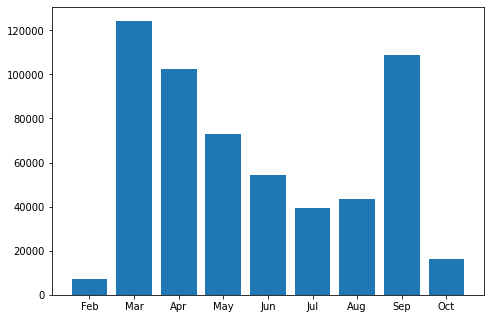

In [19]:
months = ["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(month_sum.index.tolist(), month_sum)
plt.xticks(month_sum.index.tolist(), months)
plt.show()

<AxesSubplot:xlabel='Month', ylabel='Kg'>

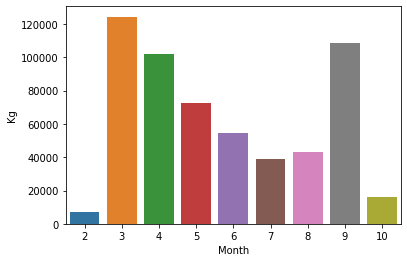

In [20]:
sns.barplot(data = df
            ,x = 'Month'
            ,y = 'Kg'
            ,ci = None
            ,estimator = sum
            )

<AxesSubplot:xlabel='Temperature', ylabel='Kg'>

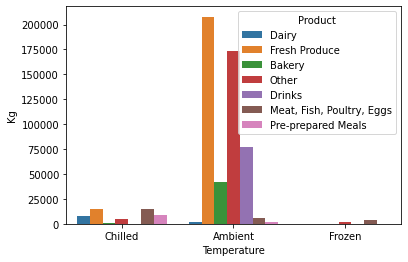

In [21]:
sns.barplot(data = df
            ,x = 'Temperature'
            ,y = 'Kg'
            ,ci = None
            ,estimator = sum
            ,hue='Product'
            )